# Exploration

In [1]:
print("test")

test


In [2]:
import pandas as pd
from LabData.DataLoaders.GutMBLoader import GutMBLoader
from LabData.DataLoaders.SubjectLoader import SubjectLoader
from LabData.DataLoaders.DietLoggingLoader import DietLoggingLoader
from LabData.DataLoaders.LifeStyleLoader import LifeStyleLoader
from LabData.DataLoaders.BodyMeasuresLoader import BodyMeasuresLoader
from LabData.DataAnalyses.TenK_Trajectories.utils import get_diet_logging_around_stage
import numpy as np
import os
import pickle

In [3]:
stage = 'baseline' # 'baseline' or '02_00_visit'
species = 'segal_species' # 'segal_species' or 'mpa_species'
project = 'diet' # 'diet' or 'david'
min_col_present_frac = 0.05

In [4]:
if project == 'diet':
    path = '/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/'
elif project == 'david':
    path = '/net/mraid20/export/genie/LabData/Analyses/tomerse/david_colab/'

In [5]:
def explore_columns(df):
    for column in df.columns:
        print(column)
        print(df[column].value_counts())

## study_ids = [10, 1001, 1002]
study_ids = [10]
subjects_dl = SubjectLoader()
subjects_data = subjects_dl.get_data(groupby_reg='first', study_ids=study_ids)
subjects_df = subjects_data.df
print(subjects_df)

                                             StudyTypeID         city country  \
RegistrationCode Date                                                           
10K_1000028368   2020-03-22 08:26:05.077073         10.0         None      IL   
10K_1000273395   2020-03-05 20:53:54.399388         10.0         None      IL   
10K_1000633050   2021-06-21 14:23:50.372010         10.0         None      IL   
10K_1000942861   2021-06-11 11:30:37.386358         10.0       רחובות      IL   
10K_1001106466   2024-12-15 15:42:22.632981         10.0         None      IL   
...                                                  ...          ...     ...   
10K_9999226141   2019-12-04 07:07:07.815688         10.0      בני ראם      IL   
10K_9999409119   2020-02-22 15:19:08.365584         10.0  תל אביב-יפו      IL   
10K_9999623844   2023-02-19 01:46:16.838996         10.0         None      IL   
10K_9999732920   2022-12-23 22:20:48.083986         10.0         None      IL   
10K_9999767769   2020-01-31 

## Metabolic Pathways

In [6]:
import pandas as pd

def concat_and_filter_by_stage(df1, df2):
    # Add 'research_stage' as a new index level
    df1 = df1.copy()
    df2 = df2.copy()
    df1['research_stage'] = 'baseline'
    df2['research_stage'] = '02_visit'

    # Set MultiIndex: RegistrationCode and research_stage
    df1.set_index('research_stage', append=True, inplace=True)
    df2.set_index('research_stage', append=True, inplace=True)

    # Combine DataFrames
    combined = pd.concat([df1, df2])

    # Get RegistrationCodes that appear in both stages
    code_counts = combined.index.get_level_values('RegistrationCode').value_counts()
    codes_with_both = code_counts[code_counts == 2].index

    # Filter to only those codes
    filtered = combined.loc[combined.index.get_level_values('RegistrationCode').isin(codes_with_both)]

    return filtered


Nastya's new humann

In [11]:
humann_pathways = pd.read_parquet('/net/mraid20/export/mb/MBPipeline/Analyses/HUMAnN/joined_pathways/all_pathabundances.parquet')
humann_pathways

KeyboardInterrupt: 

Old humann validation

In [ ]:
diet_mb_pathways = pd.read_pickle(f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/diet_mb_pathways.pkl")
diet_mb_02_visit_pathways = pd.read_pickle(f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/diet_mb_pathways_02_visit.pkl")

with open(f'/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/my_lists_pathways.pkl', 'rb') as file:
    loaded_lists = pickle.load(file)
base_features, features, target_input = loaded_lists

combined_pathways = concat_and_filter_by_stage(diet_mb_pathways[target_input], diet_mb_02_visit_pathways[target_input])
combined_pathways

,,1CMET2-PWY: folate transformations III (E. coli),3-HYDROXYPHENYLACETATE-DEGRADATION-PWY: 4-hydroxyphenylacetate degradation,ALLANTOINDEG-PWY: superpathway of allantoin degradation in yeast,ANAEROFRUCAT-PWY: homolactic fermentation,ANAGLYCOLYSIS-PWY: glycolysis III (from glucose),ARG+POLYAMINE-SYN: superpathway of arginine and polyamine biosynthesis,"ARGDEG-PWY: superpathway of L-arginine, putrescine, and 4-aminobutanoate degradation",ARGININE-SYN4-PWY: L-ornithine biosynthesis II,ARGSYN-PWY: L-arginine biosynthesis I (via L-ornithine),ARGSYNBSUB-PWY: L-arginine biosynthesis II (acetyl cycle),...,SO4ASSIM-PWY: assimilatory sulfate reduction I,SULFATE-CYS-PWY: superpathway of sulfate assimilation and cysteine biosynthesis,TCA-GLYOX-BYPASS: superpathway of glyoxylate bypass and TCA,TCA: TCA cycle I (prokaryotic),THISYNARA-PWY: superpathway of thiamine diphosphate biosynthesis III (eukaryotes),THREOCAT-PWY: superpathway of L-threonine metabolism,THRESYN-PWY: superpathway of L-threonine biosynthesis,TRNA-CHARGING-PWY: tRNA charging,UDPNAGSYN-PWY: UDP-N-acetyl-D-glucosamine biosynthesis I,VALSYN-PWY: L-valine biosynthesis
RegistrationCode,research_stage,,,,,,,,,,,,,,,,,,,,,
10K_1009247427,baseline,0.000344,0.0,0.000004,0.000162,0.000303,0.000000,0.0,0.000088,0.000362,0.000365,...,0.000000,0.000000,0.0,0.000000,0.000079,0.0,0.000174,0.000598,0.000170,0.000354
10K_1020360784,baseline,0.000370,0.0,0.000006,0.000201,0.000486,0.000141,0.0,0.000142,0.000395,0.000402,...,0.000000,0.000000,0.0,0.000000,0.000209,0.0,0.000267,0.000518,0.000228,0.000471
10K_1021660035,baseline,0.000310,0.0,0.000000,0.000193,0.000349,0.000057,0.0,0.000081,0.000395,0.000395,...,0.000000,0.000000,0.0,0.000000,0.000095,0.0,0.000252,0.000645,0.000340,0.000485
10K_1033799406,baseline,0.000417,0.0,0.000000,0.000118,0.000341,0.000045,0.0,0.000143,0.000379,0.000334,...,0.000019,0.000039,0.0,0.000000,0.000128,0.0,0.000261,0.000504,0.000115,0.000516
10K_1038285016,baseline,0.000355,0.0,0.000000,0.000131,0.000431,0.000018,0.0,0.000166,0.000220,0.000209,...,0.000044,0.000067,0.0,0.000000,0.000148,0.0,0.000256,0.000523,0.000124,0.000601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_9971099442,02_visit,0.000289,0.0,0.000000,0.000150,0.000367,0.000037,0.0,0.000148,0.000342,0.000350,...,0.000000,0.000000,0.0,0.000000,0.000098,0.0,0.000241,0.000578,0.000148,0.000390
10K_9972023164,02_visit,0.000397,0.0,0.000000,0.000138,0.000431,0.000092,0.0,0.000103,0.000308,0.000295,...,0.000000,0.000000,0.0,0.000000,0.000169,0.0,0.000269,0.000508,0.000178,0.000492
10K_9976173468,02_visit,0.000416,0.0,0.000006,0.000198,0.000553,0.000000,0.0,0.000253,0.000530,0.000532,...,0.000000,0.000000,0.0,0.000000,0.000238,0.0,0.000287,0.000617,0.000237,0.000624


In [ ]:
combined_pathways = combined_pathways.div(combined_pathways.sum(axis=1), axis=0)

combined_pathways = combined_pathways.apply(lambda r: (r - r.mean()) / r.std(), axis=0)

combined_pathways.describe()

,1CMET2-PWY: folate transformations III (E. coli),3-HYDROXYPHENYLACETATE-DEGRADATION-PWY: 4-hydroxyphenylacetate degradation,ALLANTOINDEG-PWY: superpathway of allantoin degradation in yeast,ANAEROFRUCAT-PWY: homolactic fermentation,ANAGLYCOLYSIS-PWY: glycolysis III (from glucose),ARG+POLYAMINE-SYN: superpathway of arginine and polyamine biosynthesis,"ARGDEG-PWY: superpathway of L-arginine, putrescine, and 4-aminobutanoate degradation",ARGININE-SYN4-PWY: L-ornithine biosynthesis II,ARGSYN-PWY: L-arginine biosynthesis I (via L-ornithine),ARGSYNBSUB-PWY: L-arginine biosynthesis II (acetyl cycle),...,SO4ASSIM-PWY: assimilatory sulfate reduction I,SULFATE-CYS-PWY: superpathway of sulfate assimilation and cysteine biosynthesis,TCA-GLYOX-BYPASS: superpathway of glyoxylate bypass and TCA,TCA: TCA cycle I (prokaryotic),THISYNARA-PWY: superpathway of thiamine diphosphate biosynthesis III (eukaryotes),THREOCAT-PWY: superpathway of L-threonine metabolism,THRESYN-PWY: superpathway of L-threonine biosynthesis,TRNA-CHARGING-PWY: tRNA charging,UDPNAGSYN-PWY: UDP-N-acetyl-D-glucosamine biosynthesis I,VALSYN-PWY: L-valine biosynthesis
count,3.324000e+03,3.324000e+03,3.324000e+03,3.324000e+03,3.324000e+03,3.324000e+03,3.324000e+03,3.324000e+03,3.324000e+03,3.324000e+03,...,3.324000e+03,3.324000e+03,3.324000e+03,3.324000e+03,3.324000e+03,3324.000000,3.324000e+03,3.324000e+03,3.324000e+03,3.324000e+03
mean,7.802289e-16,-6.412841e-18,7.000684e-17,-2.672017e-16,1.026054e-16,1.843692e-16,1.175687e-17,4.702750e-17,-9.405500e-17,2.907154e-16,...,-1.496329e-17,-2.778898e-17,2.137614e-18,4.275227e-17,4.488988e-17,0.000000,3.163668e-16,1.474953e-16,-1.752843e-16,-2.415503e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.450397e+00,-1.672321e-01,-7.217694e-01,-3.637668e+00,-3.352567e+00,-1.252968e+00,-1.537043e-01,-1.892269e+00,-3.409239e+00,-3.156744e+00,...,-5.549577e-01,-6.960763e-01,-2.687284e-01,-3.520403e-01,-2.729493e+00,-0.176811,-4.596992e+00,-2.964233e+00,-2.101517e+00,-2.436289e+00
25%,-4.870344e-01,-1.672321e-01,-7.217694e-01,-5.929471e-01,-5.822933e-01,-7.418742e-01,-1.537043e-01,-7.905245e-01,-6.030858e-01,-6.451903e-01,...,-5.549577e-01,-6.960763e-01,-2.687284e-01,-3.520403e-01,-7.138593e-01,-0.176811,-5.680955e-01,-7.132354e-01,-7.088449e-01,-5.466015e-01
50%,6.788831e-02,-1.672321e-01,-7.217694e-01,6.311051e-02,-1.136503e-01,-1.965491e-01,-1.537043e-01,-9.839143e-02,6.935839e-02,6.393539e-02,...,-3.913744e-01,-3.985680e-01,-2.687284e-01,-3.520403e-01,2.145655e-02,-0.176811,8.688631e-02,-1.273821e-01,-1.285870e-01,-2.327779e-01
75%,5.978304e-01,-1.672321e-01,4.921524e-01,6.784709e-01,4.213894e-01,5.704859e-01,-1.537043e-01,6.967130e-01,7.007116e-01,6.978703e-01,...,5.847131e-02,3.089686e-01,-2.687284e-01,-3.520403e-01,7.275791e-01,-0.176811,6.592292e-01,5.908680e-01,5.740189e-01,2.098420e-01
max,5.415597e+00,1.248687e+01,6.941865e+00,2.934817e+00,4.569660e+00,4.054338e+00,1.618168e+01,6.232928e+00,3.127725e+00,3.186594e+00,...,6.833214e+00,4.849606e+00,8.826111e+00,7.753631e+00,3.860554e+00,11.944938,3.177723e+00,5.965682e+00,5.858015e+00,5.772246e+00


In [ ]:
diet_mb_abundance = pd.read_pickle(f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/diet_mb.pkl")
diet_mb_02_visit_abundance = pd.read_pickle(f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/diet_mb_02_visit.pkl")

with open(f'/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/my_lists.pkl', 'rb') as file:
    loaded_lists = pickle.load(file)
base_features, features, target_input = loaded_lists

combined_abundance = concat_and_filter_by_stage(diet_mb_abundance[target_input], diet_mb_02_visit_abundance[target_input])
combined_abundance

,,fBin__100|gBin__473|sBin__693,fBin__100|gBin__473|sBin__694,fBin__100|gBin__474|sBin__695,fBin__100|gBin__477|sBin__698,fBin__100|gBin__481|sBin__704,fBin__100|gBin__481|sBin__705,fBin__100|gBin__481|sBin__706,fBin__100|gBin__483|sBin__709,fBin__102|gBin__490|sBin__720,fBin__102|gBin__490|sBin__721,...,fBin__86|gBin__428|sBin__630,fBin__86|gBin__429|sBin__631,fBin__88|gBin__434|sBin__637,fBin__94|gBin__448|sBin__654,fBin__94|gBin__449|sBin__656,fBin__95|gBin__450|sBin__659,fBin__96|gBin__457|sBin__669,fBin__97|gBin__462|sBin__676,fBin__97|gBin__462|sBin__678,fBin__99|gBin__469|sBin__687
RegistrationCode,research_stage,,,,,,,,,,,,,,,,,,,,,
10K_1001201093,baseline,-4.000000,-4.0,-4.000000,-2.963934,-4.000000,-4.000000,-4.000000,-1.937015,-4.0,-1.459653,...,-4.0,-4.000000,-4.00000,-4.000000,-4.0,-4.0,-4.0,-4.000000,-4.000000,-4.000000
10K_1002254441,baseline,-4.000000,-4.0,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.0,-1.604248,...,-4.0,-4.000000,-4.00000,-3.228756,-4.0,-4.0,-4.0,-4.000000,-2.383721,-4.000000
10K_1007400622,baseline,-4.000000,-4.0,-4.000000,-3.749195,-3.572289,-3.052570,-2.163850,-2.270099,-4.0,-4.000000,...,-4.0,-4.000000,-4.00000,-4.000000,-4.0,-4.0,-4.0,-4.000000,-4.000000,-4.000000
10K_1008294272,baseline,-4.000000,-4.0,-4.000000,-2.156318,-4.000000,-4.000000,-4.000000,-2.728680,-4.0,-1.790285,...,-4.0,-4.000000,-2.89699,-3.094472,-4.0,-4.0,-4.0,-4.000000,-2.971048,-4.000000
10K_1009247427,baseline,-4.000000,-4.0,-4.000000,-2.258914,-4.000000,-4.000000,-4.000000,-4.000000,-4.0,-4.000000,...,-4.0,-4.000000,-4.00000,-3.083257,-4.0,-4.0,-4.0,-3.386472,-4.000000,-4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_9985667572,02_visit,-4.000000,-4.0,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.0,-4.000000,...,-4.0,-4.000000,-4.00000,-4.000000,-4.0,-4.0,-4.0,-2.571729,-4.000000,-4.000000
10K_9991294748,02_visit,-4.000000,-4.0,-2.285868,-2.969624,-3.565266,-3.089166,-2.249283,-4.000000,-4.0,-4.000000,...,-4.0,-4.000000,-4.00000,-4.000000,-4.0,-4.0,-4.0,-4.000000,-4.000000,-4.000000
10K_9995623290,02_visit,-4.000000,-4.0,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.0,-1.272577,...,-4.0,-4.000000,-4.00000,-3.338972,-4.0,-4.0,-4.0,-4.000000,-2.361901,-2.673434


### Validation

As function (from Gemini):

In [ ]:
import pandas as pd
import numpy as np

def analyze_self_matches(data_df,
                         reg_code_level_name="RegistrationCode",
                         research_stage_level_name="research_stage",
                         min_corr_periods=1):
    """
    Analyzes a DataFrame to find how many samples (person-research stages)
    match themselves at a different research stage as either the 1st or 2nd
    highest Spearman correlation.

    Args:
        data_df (pd.DataFrame): The input DataFrame. Must have a MultiIndex with
                                levels specified by reg_code_level_name and
                                research_stage_level_name. Columns should be
                                features for correlation.
        reg_code_level_name (str): Name of the index level for registration code
                                   (person identifier).
        research_stage_level_name (str): Name of the index level for the
                                         research stage.
        min_corr_periods (int): Minimum number of observations required per pair
                                of columns to have a valid correlation result.

    Returns:
        tuple: A tuple containing:
            - results_df (pd.DataFrame): DataFrame with detailed matching results
                                         for each sample.
            - summary_stats (dict): Dictionary with summary statistics of self-matches.
    """

    print(f"Starting analysis for DataFrame with shape: {data_df.shape}")
    print(f"Using Registration Code level: '{reg_code_level_name}'")
    print(f"Using Research Stage level: '{research_stage_level_name}'")
    print(f"Minimum periods for correlation: {min_corr_periods}")

    # --- 1. Prepare Data and Calculate Spearman Correlation ---
    # Transpose the DataFrame
    data_transposed = data_df.T

    # Calculate the Spearman correlation
    try:
        corr_matrix = data_transposed.corr(method='spearman', min_periods=min_corr_periods)
    except Exception as e:
        print(f"Error during correlation calculation: {e}")
        print("Please ensure your data is numeric and suitable for correlation.")
        # Optionally, re-raise or return None/empty results
        raise

    # Fill the diagonal with NaN
    np.fill_diagonal(corr_matrix.values, np.nan)
    # print("Correlation matrix calculated and diagonal set to NaN.")

    # --- 2. Find Best and Second Best Matches ---
    results = []

    if corr_matrix.empty:
        print("Warning: Correlation matrix is empty. No results to process.")
        return pd.DataFrame(), {} # Return empty results

    for original_sample_idx in corr_matrix.index:
        try:
            # Ensure index levels exist and are correctly accessed
            original_reg_code = original_sample_idx[corr_matrix.columns.names.index(reg_code_level_name)]
            original_research_stage = original_sample_idx[corr_matrix.columns.names.index(research_stage_level_name)]
        except (IndexError, ValueError) as e:
            # This handles cases where the original_sample_idx might not be a tuple
            # or the level names are not found as expected (though they should be if index is set right)
            # For MultiIndex columns, original_sample_idx will be a tuple.
            # For MultiIndex rows, .index will give the list of tuples.
            # corr_matrix.index should directly provide the (reg_code, research_stage) tuples.
            if isinstance(original_sample_idx, tuple) and len(original_sample_idx) == 2:
                 original_reg_code = original_sample_idx[0] # Assuming 0 is reg_code
                 original_research_stage = original_sample_idx[1] # Assuming 1 is research_stage
            else:
                print(f"Could not parse original_sample_idx: {original_sample_idx}. Error: {e}")
                print(f"Expected index levels: {reg_code_level_name}, {research_stage_level_name}")
                print(f"Correlation matrix index names: {corr_matrix.index.names}")
                print(f"Correlation matrix column names: {corr_matrix.columns.names}")
                continue # Skip this sample if parsing fails


        correlations_for_sample = corr_matrix.loc[original_sample_idx]
        sorted_correlations = correlations_for_sample.dropna().sort_values(ascending=False)

        best_match_reg_code, best_match_research_stage, best_match_corr_value = None, None, np.nan
        is_best_match_self_other_stage = False
        second_best_match_reg_code, second_best_match_research_stage, second_best_match_corr_value = None, None, np.nan
        is_second_best_match_self_other_stage = False

        if len(sorted_correlations) > 0:
            best_match_idx = sorted_correlations.index[0]
            best_match_reg_code = best_match_idx[0]
            best_match_research_stage = best_match_idx[1]
            best_match_corr_value = sorted_correlations.iloc[0]
            if (best_match_reg_code == original_reg_code) and \
               (best_match_research_stage != original_research_stage):
                is_best_match_self_other_stage = True

        if len(sorted_correlations) > 1:
            second_best_match_idx = sorted_correlations.index[1]
            second_best_match_reg_code = second_best_match_idx[0]
            second_best_match_research_stage = second_best_match_idx[1]
            second_best_match_corr_value = sorted_correlations.iloc[1]
            if (second_best_match_reg_code == original_reg_code) and \
               (second_best_match_research_stage != original_research_stage):
                is_second_best_match_self_other_stage = True

        results.append({
            'Original_RegistrationCode': original_reg_code,
            'Original_ResearchStage': original_research_stage,
            'BestMatch_RegistrationCode': best_match_reg_code,
            'BestMatch_ResearchStage': best_match_research_stage,
            'BestMatch_Correlation': best_match_corr_value,
            'IsBestMatch_SelfOtherStage': is_best_match_self_other_stage,
            'SecondBestMatch_RegistrationCode': second_best_match_reg_code,
            'SecondBestMatch_ResearchStage': second_best_match_research_stage,
            'SecondBestMatch_Correlation': second_best_match_corr_value,
            'IsSecondBestMatch_SelfOtherStage': is_second_best_match_self_other_stage,
        })

    results_df = pd.DataFrame(results)
    # print("Matching results processed into DataFrame.")

    # --- 3. Summarize the Results ---
    summary_stats = {}
    if results_df.empty:
        print("Warning: Results DataFrame is empty. Cannot generate summary statistics.")
        summary_stats = {
            'total_samples': 0,
            'count_self_match_as_1st': 0,
            'count_self_match_as_2nd': 0,
            'count_self_match_as_1st_or_2nd': 0,
            'percent_self_match_as_1st': 0.0,
            'percent_self_match_as_2nd': 0.0,
            'percent_self_match_as_1st_or_2nd': 0.0,
        }
        return results_df, summary_stats


    total_samples = len(results_df)
    count_self_match_as_1st = results_df['IsBestMatch_SelfOtherStage'].sum()
    count_self_match_as_2nd = results_df['IsSecondBestMatch_SelfOtherStage'].sum()
    count_self_match_as_1st_or_2nd = (results_df['IsBestMatch_SelfOtherStage'] | \
                                      results_df['IsSecondBestMatch_SelfOtherStage']).sum()

    summary_stats['total_samples'] = total_samples
    summary_stats['count_self_match_as_1st'] = int(count_self_match_as_1st)
    summary_stats['count_self_match_as_2nd'] = int(count_self_match_as_2nd)
    summary_stats['count_self_match_as_1st_or_2nd'] = int(count_self_match_as_1st_or_2nd)

    if total_samples > 0:
        summary_stats['percent_self_match_as_1st'] = \
            (count_self_match_as_1st / total_samples) * 100
        summary_stats['percent_self_match_as_2nd'] = \
            (count_self_match_as_2nd / total_samples) * 100
        summary_stats['percent_self_match_as_1st_or_2nd'] = \
            (count_self_match_as_1st_or_2nd / total_samples) * 100
    else:
        summary_stats['percent_self_match_as_1st'] = 0.0
        summary_stats['percent_self_match_as_2nd'] = 0.0
        summary_stats['percent_self_match_as_1st_or_2nd'] = 0.0
    
    print("Analysis complete.")
    return results_df, summary_stats

In [ ]:
detailed_results_pathways, summary_pathways = analyze_self_matches(
    combined_pathways,
    reg_code_level_name="RegistrationCode", # if different from "RegistrationCode"
    research_stage_level_name="research_stage",    # if different from "research_stage"
    min_corr_periods=20 # Or your desired value
)
summary_pathways

Starting analysis for DataFrame with shape: (3324, 362)
Using Registration Code level: 'RegistrationCode'
Using Research Stage level: 'research_stage'
Minimum periods for correlation: 20
Analysis complete.


{'total_samples': 3324,
 'count_self_match_as_1st': 544,
 'count_self_match_as_2nd': 132,
 'count_self_match_as_1st_or_2nd': 676,
 'percent_self_match_as_1st': 16.365824308062578,
 'percent_self_match_as_2nd': 3.9711191335740073,
 'percent_self_match_as_1st_or_2nd': 20.33694344163658}

In [ ]:
detailed_results_abundance, summary_abundance = analyze_self_matches(
    combined_abundance,
    reg_code_level_name="RegistrationCode", # if different from "RegistrationCode"
    research_stage_level_name="research_stage",    # if different from "research_stage"
    min_corr_periods=20 # Or your desired value
)
summary_abundance

Starting analysis for DataFrame with shape: (7514, 724)
Using Registration Code level: 'RegistrationCode'
Using Research Stage level: 'research_stage'
Minimum periods for correlation: 20
Analysis complete.


{'total_samples': 7514,
 'count_self_match_as_1st': 6648,
 'count_self_match_as_2nd': 113,
 'count_self_match_as_1st_or_2nd': 6761,
 'percent_self_match_as_1st': 88.4748469523556,
 'percent_self_match_as_2nd': 1.503859462336971,
 'percent_self_match_as_1st_or_2nd': 89.97870641469258}

Histograms

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

def plot_correlation_histograms(data_df,
                                reg_code_level_name="RegistrationCode",
                                research_stage_level_name="research_stage",
                                min_corr_periods=1,
                                num_other_people_sample=10,
                                bins=20,
                                figure_title="Distribution of Spearman Correlations",
                                dataset_name=""):
    """
    Generates and displays overlaid histograms of self-to-self (different visit)
    correlations and self-to-other (mean of N others) correlations.

    Args:
        data_df (pd.DataFrame): Input DataFrame with a MultiIndex (reg_code, research_stage).
        reg_code_level_name (str): Name of the RegistrationCode index level.
        research_stage_level_name (str): Name of the research_stage index level.
        min_corr_periods (int): Minimum periods for pandas .corr() method.
        num_other_people_sample (int): Number of other people to sample for self-to-other calculation.
        bins (int or sequence): Number of bins for the histograms.
        figure_title (str): Title for the plot.
        dataset_name (str): Optional name for the dataset to include in labels/title.

    Returns:
        tuple: (fig, ax) handles for the matplotlib figure and axes.
               Returns (None, None) if data processing fails.
    """

    print(f"Processing dataset: {dataset_name if dataset_name else 'Unnamed'}")

    # --- 1. Calculate Spearman Correlation Matrix (Visit-Level) ---
    data_transposed = data_df.T
    try:
        # Ensure index names of transposed df are set for proper MultiIndex in corr_matrix
        data_transposed.columns.names = [reg_code_level_name, research_stage_level_name]
        corr_matrix = data_transposed.corr(method='spearman', min_periods=min_corr_periods)
    except Exception as e:
        print(f"Error during correlation calculation: {e}")
        return None, None

    np.fill_diagonal(corr_matrix.values, np.nan) # Exclude self-correlation at same stage

    if corr_matrix.empty:
        print("Correlation matrix is empty. Cannot proceed.")
        return None, None

    # Get unique registration codes and research stages present in the correlation matrix
    # This ensures we only work with codes/stages that actually produced correlation values
    valid_indices = corr_matrix.index
    unique_reg_codes = valid_indices.get_level_values(reg_code_level_name).unique()

    # --- 2. Calculate Self-to-Self (Different Visit) Correlations ---
    self_to_self_correlations = []
    for reg_code in unique_reg_codes:
        # Find the specific visits (stages) for this reg_code from the corr_matrix index
        person_visits_indices = [idx for idx in valid_indices if idx[0] == reg_code]

        if len(person_visits_indices) == 2: # Expecting two visits
            visit1_idx = person_visits_indices[0]
            visit2_idx = person_visits_indices[1]
            # Ensure both indices exist in the matrix (should be true if from valid_indices)
            if visit1_idx in corr_matrix.index and visit2_idx in corr_matrix.columns:
                correlation = corr_matrix.loc[visit1_idx, visit2_idx]
                if pd.notna(correlation):
                    self_to_self_correlations.append(correlation)
            # else: # Should not happen if logic is correct
            #     print(f"Warning: Could not find visit correlation for {reg_code} between {visit1_idx} and {visit2_idx}")
        # elif len(person_visits_indices) == 1:
            # print(f"Note: {reg_code} has only one visit in the correlation matrix. Skipping self-to-self.")
        # else:
            # print(f"Note: {reg_code} has {len(person_visits_indices)} visits. Expected 2 for self-to-self. Skipping.")


    # --- 3. Calculate Self-to-Other (Mean of N Others) Correlations ---
    self_to_other_mean_correlations = []
    all_available_reg_codes = list(unique_reg_codes)

    for current_reg_code in unique_reg_codes:
        other_reg_codes = [rc for rc in all_available_reg_codes if rc != current_reg_code]

        if not other_reg_codes:
            # print(f"Note: No other people available for {current_reg_code} to compare against. Skipping.")
            continue

        if len(other_reg_codes) > num_other_people_sample:
            sampled_other_codes = random.sample(other_reg_codes, num_other_people_sample)
        else:
            sampled_other_codes = other_reg_codes # Use all if fewer than N

        current_person_visits_indices = [idx for idx in valid_indices if idx[0] == current_reg_code]
        if not current_person_visits_indices: # Should not happen if current_reg_code from unique_reg_codes
            continue

        corrs_to_sampled_others_means = [] # For this current_reg_code, avg corr to each sampled_other_code
        for other_code in sampled_other_codes:
            other_person_visits_indices = [idx for idx in valid_indices if idx[0] == other_code]
            if not other_person_visits_indices: # Should not happen
                continue

            cross_visit_corrs_for_this_pair = []
            for pv_idx in current_person_visits_indices:
                for ov_idx in other_person_visits_indices:
                    # Ensure indices are in the matrix before attempting .loc
                    if pv_idx in corr_matrix.index and ov_idx in corr_matrix.columns:
                        correlation = corr_matrix.loc[pv_idx, ov_idx]
                        if pd.notna(correlation):
                            cross_visit_corrs_for_this_pair.append(correlation)
            
            if cross_visit_corrs_for_this_pair:
                mean_corr_to_this_other_person = np.mean(cross_visit_corrs_for_this_pair)
                corrs_to_sampled_others_means.append(mean_corr_to_this_other_person)

        if corrs_to_sampled_others_means: # If any valid mean correlations to other people were found
            overall_mean_to_others = np.mean(corrs_to_sampled_others_means)
            self_to_other_mean_correlations.append(overall_mean_to_others)

    # --- 4. Plotting ---
    if not self_to_self_correlations and not self_to_other_mean_correlations:
        print("No correlation data available to plot histograms.")
        return None, None

    fig, ax = plt.subplots(figsize=(12, 7))

    plot_title = figure_title
    if dataset_name:
        plot_title += f" ({dataset_name})"
    ax.set_title(plot_title)
    ax.set_xlabel("Spearman Correlation Coefficient")
    ax.set_ylabel("Frequency" if not (len(self_to_self_correlations) > 0 and len(self_to_other_mean_correlations) > 0 and plt.gca().get_ylabel() == 'Density') else "Density")


    if self_to_self_correlations:
        ax.hist(self_to_self_correlations, bins=bins, alpha=0.7, label=f'Self-to-Self (Other Visit)\n(N={len(self_to_self_correlations)})', density=True)
        print(f"Self-to-Self: N={len(self_to_self_correlations)}, Mean={np.mean(self_to_self_correlations):.3f}, Std={np.std(self_to_self_correlations):.3f}")


    if self_to_other_mean_correlations:
        ax.hist(self_to_other_mean_correlations, bins=bins, alpha=0.7, label=f'Self-to-Other (Mean of ~{num_other_people_sample} Others)\n(N={len(self_to_other_mean_correlations)})', density=True)
        print(f"Self-to-Other: N={len(self_to_other_mean_correlations)}, Mean={np.mean(self_to_other_mean_correlations):.3f}, Std={np.std(self_to_other_mean_correlations):.3f}")

    if self_to_self_correlations or self_to_other_mean_correlations:
        ax.legend(loc='best')
        ax.grid(axis='y', alpha=0.75)
    else: # Should be caught earlier, but as a fallback
        ax.text(0.5, 0.5, "No data to display", ha='center', va='center', transform=ax.transAxes)


    plt.tight_layout()
    return fig, ax


Processing dataset: Pathways
Self-to-Self: N=1662, Mean=0.433, Std=0.244
Self-to-Other: N=1662, Mean=0.025, Std=0.065


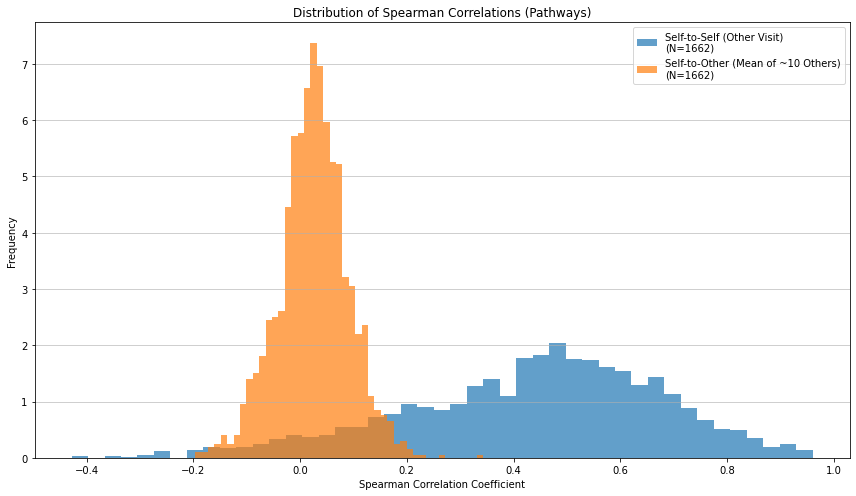

In [ ]:
fig1, ax1 = plot_correlation_histograms(
    combined_pathways,
    reg_code_level_name="RegistrationCode",
    research_stage_level_name="research_stage",
    min_corr_periods=5, # Using 5 for slightly more robustness with random data
    num_other_people_sample=10, # Using 3 for faster test with small N of people
    bins=45,
    dataset_name="Pathways"
)
if fig1:
    plt.show()

Processing dataset: Abundance
Self-to-Self: N=3757, Mean=0.682, Std=0.111
Self-to-Other: N=3757, Mean=0.346, Std=0.051


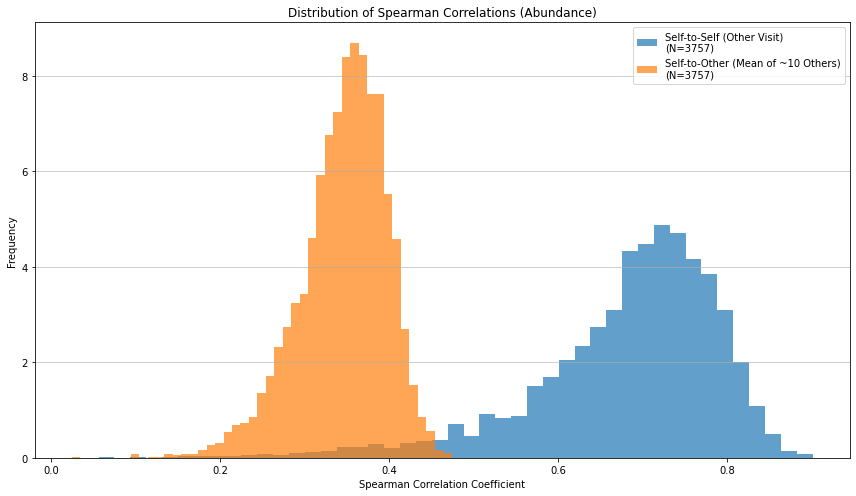

In [ ]:
fig2, ax2 = plot_correlation_histograms(
    combined_abundance,
    reg_code_level_name="RegistrationCode",
    research_stage_level_name="research_stage",
    min_corr_periods=5, # Using 5 for slightly more robustness with random data
    num_other_people_sample=10, # Using 3 for faster test with small N of people
    bins=45,
    dataset_name="Abundance"
)
if fig2:
    plt.show()

Extended correlation validation

In [ ]:
import pandas as pd
import numpy as np

def analyze_self_matches_extended(data_df,
                                  reg_code_level_name="RegistrationCode",
                                  research_stage_level_name="research_stage",
                                  min_corr_periods=1,
                                  self_match_rank_range_exclusive_of_1st=None, # e.g., (2, 10)
                                  self_match_top_percentile_threshold=None # e.g., 5 for top 5%
                                 ):
    """
    Analyzes a DataFrame to find how well samples (person-research stages)
    match their corresponding 'other stage' sample from the same person.
    Reports rank of this self-match and if it falls into specified rank ranges or percentiles.

    Args:
        data_df (pd.DataFrame): Input DataFrame with MultiIndex (reg_code, research_stage).
        reg_code_level_name (str): Name of the RegistrationCode index level.
        research_stage_level_name (str): Name of the research_stage index level.
        min_corr_periods (int): Minimum periods for pandas .corr() method.
        self_match_rank_range_exclusive_of_1st (tuple, optional): (min_rank, max_rank)
            e.g., (2, 10) to check for self-matches in ranks 2 through 10.
            Rank 1 is reported separately.
        self_match_top_percentile_threshold (float, optional): e.g., 5 to check if
            the self-match is within the top 5% (numerically low percentile) of all matches.

    Returns:
        tuple: A tuple containing:
            - results_df (pd.DataFrame): DataFrame with detailed rank and correlation
                                         of self-match for each sample.
            - summary_stats (dict): Dictionary with summary statistics.
    """

    print(f"Starting extended self-match analysis...")
    print(f"Using Registration Code level: '{reg_code_level_name}'")
    print(f"Using Research Stage level: '{research_stage_level_name}'")
    if self_match_rank_range_exclusive_of_1st:
        print(f"Checking for self-match in rank range: {self_match_rank_range_exclusive_of_1st} (Note: Rank 1 reported separately)")
    if self_match_top_percentile_threshold:
        print(f"Checking for self-match in top {self_match_top_percentile_threshold:.1f}% percentile.")

    # --- 1. Prepare Data and Calculate Spearman Correlation ---
    data_transposed = data_df.T
    try:
        data_transposed.columns.names = [reg_code_level_name, research_stage_level_name]
        corr_matrix = data_transposed.corr(method='spearman', min_periods=min_corr_periods)
    except Exception as e:
        print(f"Error during correlation calculation: {e}")
        raise
    np.fill_diagonal(corr_matrix.values, np.nan) # Exclude correlation with self at the exact same stage

    if corr_matrix.empty:
        print("Warning: Correlation matrix is empty. Returning empty results.")
        return pd.DataFrame(), {}

    # --- 2. For each sample, find the rank of its "other self" ---
    detailed_results_list = []
    
    # Helper to quickly get all stages for a person present in the corr_matrix
    person_to_stages_map = {}
    for idx_tuple in corr_matrix.index:
        # Assuming idx_tuple is (reg_code, r_stage)
        reg_code_val = idx_tuple[corr_matrix.index.names.index(reg_code_level_name)]
        r_stage_val = idx_tuple[corr_matrix.index.names.index(research_stage_level_name)]
        if reg_code_val not in person_to_stages_map:
            person_to_stages_map[reg_code_val] = set()
        person_to_stages_map[reg_code_val].add(r_stage_val)

    for original_sample_idx in corr_matrix.index:
        original_reg_code = original_sample_idx[corr_matrix.index.names.index(reg_code_level_name)]
        original_research_stage = original_sample_idx[corr_matrix.index.names.index(research_stage_level_name)]

        rank_of_self_match = np.nan
        corr_val_of_self_match = np.nan
        num_possible_matches = 0
        percentile_rank_of_self_match = np.nan
        target_self_other_stage_idx = None

        stages_for_this_person = sorted(list(person_to_stages_map.get(original_reg_code, set())))

        if len(stages_for_this_person) == 2:
            # If exactly two stages are found for this person in the matrix,
            # identify the "other" stage.
            other_stage_name_list = [s for s in stages_for_this_person if s != original_research_stage]
            if other_stage_name_list: # Should always be true if len is 2 and original_research_stage is one of them
                other_stage_name = other_stage_name_list[0]
                target_self_other_stage_idx = (original_reg_code, other_stage_name)
        
        correlations_for_sample = corr_matrix.loc[original_sample_idx].copy()
        sorted_correlations = correlations_for_sample.dropna().sort_values(ascending=False)
        num_possible_matches = len(sorted_correlations)

        if target_self_other_stage_idx and target_self_other_stage_idx in sorted_correlations.index:
            rank_of_self_match = sorted_correlations.index.get_loc(target_self_other_stage_idx) + 1 # 1-based rank
            corr_val_of_self_match = sorted_correlations.loc[target_self_other_stage_idx]
            if num_possible_matches > 0:
                percentile_rank_of_self_match = (rank_of_self_match / num_possible_matches) * 100
        
        detailed_results_list.append({
            'Original_RegistrationCode': original_reg_code,
            'Original_ResearchStage': original_research_stage,
            'Rank_of_Self_Match': rank_of_self_match,
            'Correlation_Self_Match': corr_val_of_self_match,
            'Num_Possible_Matches': num_possible_matches,
            'Percentile_Rank_Self_Match': percentile_rank_of_self_match
        })

    results_df = pd.DataFrame(detailed_results_list)

    # --- 3. Calculate Summary Statistics ---
    summary_stats = {}
    total_samples_in_matrix = len(results_df)
    # Filter for samples where a self-match rank could be determined (had an "other stage" and non-NaN correlation)
    evaluable_samples_df = results_df.dropna(subset=['Rank_of_Self_Match'])
    num_evaluable_for_self_match = len(evaluable_samples_df)

    summary_stats['total_samples_in_matrix'] = total_samples_in_matrix
    summary_stats['samples_with_determinable_self_match_rank'] = num_evaluable_for_self_match

    # Rank 1 matches
    count_rank1 = evaluable_samples_df[evaluable_samples_df['Rank_of_Self_Match'] == 1].shape[0]
    summary_stats['count_self_match_rank1'] = count_rank1
    summary_stats['percent_self_match_rank1_of_evaluable'] = \
        (count_rank1 / num_evaluable_for_self_match * 100) if num_evaluable_for_self_match > 0 else 0.0

    # Matches in specified rank range (e.g., 2-10)
    if self_match_rank_range_exclusive_of_1st:
        min_r, max_r = self_match_rank_range_exclusive_of_1st
        # Count matches strictly within the provided range (min_r to max_r).
        # Rank 1 is handled by 'count_self_match_rank1'.
        count_in_custom_range = evaluable_samples_df[
            (evaluable_samples_df['Rank_of_Self_Match'] >= min_r) &
            (evaluable_samples_df['Rank_of_Self_Match'] <= max_r)
        ].shape[0]
        summary_stats[f'count_self_match_rank_{min_r}_to_{max_r}'] = count_in_custom_range
        summary_stats[f'percent_self_match_rank_{min_r}_to_{max_r}_of_evaluable'] = \
            (count_in_custom_range / num_evaluable_for_self_match * 100) if num_evaluable_for_self_match > 0 else 0.0

        # Count of (Rank 1) OR (in custom range [min_r, max_r])
        # This ensures correct counting even if rank 1 overlaps with the custom range.
        is_rank_1 = (evaluable_samples_df['Rank_of_Self_Match'] == 1)
        is_in_custom_range = (evaluable_samples_df['Rank_of_Self_Match'] >= min_r) & \
                             (evaluable_samples_df['Rank_of_Self_Match'] <= max_r)
        count_rank1_or_in_custom_range = evaluable_samples_df[is_rank_1 | is_in_custom_range].shape[0]
        
        summary_stats[f'count_self_match_rank1_OR_rank_{min_r}_to_{max_r}'] = count_rank1_or_in_custom_range
        summary_stats[f'percent_self_match_rank1_OR_rank_{min_r}_to_{max_r}_of_evaluable'] = \
             (count_rank1_or_in_custom_range / num_evaluable_for_self_match * 100) if num_evaluable_for_self_match > 0 else 0.0

    # Matches in top X percentile
    if self_match_top_percentile_threshold is not None:
        # Percentile_Rank_Self_Match is low for good ranks (e.g., rank 1/N * 100)
        count_in_percentile = evaluable_samples_df[
            evaluable_samples_df['Percentile_Rank_Self_Match'] <= self_match_top_percentile_threshold
        ].shape[0]
        summary_stats[f'count_self_match_top_{self_match_top_percentile_threshold:.2f}_percentile'] = count_in_percentile
        summary_stats[f'percent_self_match_top_{self_match_top_percentile_threshold:.2f}_percentile_of_evaluable'] = \
            (count_in_percentile / num_evaluable_for_self_match * 100) if num_evaluable_for_self_match > 0 else 0.0

    print("Extended self-match analysis complete.")
    return results_df, summary_stats


In [ ]:
detailed_results, summary = analyze_self_matches_extended(
    combined_pathways,
    reg_code_level_name="RegistrationCode",
    research_stage_level_name="research_stage",
    min_corr_periods=20,
    self_match_rank_range_exclusive_of_1st=(2, 10), # Check for self-matches in ranks 2 through 5
    self_match_top_percentile_threshold=1.0      # Check for self-matches in top 20%
)

print("\n--- Detailed Results (sample) ---")
print(detailed_results.head(10))


print("\n--- Summary Statistics ---")
for key, value in summary.items():
    if "percent" in key:
        print(f"{key}: {value:.2f}%")
    else:
        print(f"{key}: {value}")

Starting extended self-match analysis...
Using Registration Code level: 'RegistrationCode'
Using Research Stage level: 'research_stage'
Checking for self-match in rank range: (2, 10) (Note: Rank 1 reported separately)
Checking for self-match in top 1.0% percentile.
Extended self-match analysis complete.

--- Detailed Results (sample) ---
  Original_RegistrationCode Original_ResearchStage  Rank_of_Self_Match  \
0            10K_1009247427               baseline                   1   
1            10K_1020360784               baseline                1992   
2            10K_1021660035               baseline                1570   
3            10K_1033799406               baseline                   1   
4            10K_1038285016               baseline                 490   
5            10K_1041888957               baseline                   3   
6            10K_1048446667               baseline                  30   
7            10K_1049983648               baseline                 2

In [ ]:
detailed_results, summary = analyze_self_matches_extended(
    combined_abundance,
    reg_code_level_name="RegistrationCode",
    research_stage_level_name="research_stage",
    min_corr_periods=20,
    self_match_rank_range_exclusive_of_1st=(2, 10), # Check for self-matches in ranks 2 through 5
    self_match_top_percentile_threshold=1.0      # Check for self-matches in top 20%
)

print("\n--- Detailed Results (sample) ---")
print(detailed_results.head(10))


print("\n--- Summary Statistics ---")
for key, value in summary.items():
    if "percent" in key:
        print(f"{key}: {value:.2f}%")
    else:
        print(f"{key}: {value}")

Starting extended self-match analysis...
Using Registration Code level: 'RegistrationCode'
Using Research Stage level: 'research_stage'
Checking for self-match in rank range: (2, 10) (Note: Rank 1 reported separately)
Checking for self-match in top 1.0% percentile.
Extended self-match analysis complete.

--- Detailed Results (sample) ---
  Original_RegistrationCode Original_ResearchStage  Rank_of_Self_Match  \
0            10K_1001201093               baseline                   1   
1            10K_1002254441               baseline                   1   
2            10K_1007400622               baseline                   1   
3            10K_1008294272               baseline                   1   
4            10K_1009247427               baseline                   1   
5            10K_1012027362               baseline                   1   
6            10K_1012400211               baseline                   1   
7            10K_1019174630               baseline                  